Assignment 2 Problem 1 Panchenko Mykyta

In [15]:
import numpy as np
A = np.array(([[10, -1, 2, 0],
              [-1, 11,-1,3],
              [2, -1,10,-1], 
              [3, 3, 1, 8]])).astype(float)
b = np.array(([6,25,-11,15])).astype(float)
x0 = np.array(([0,0,0,0.1])).astype(float) 
#jacobi iteration 
def jacobi_iteration(A, b, x0, err):
    Diag = np.diag(A)
    M = np.diag(Diag) #Create matrix with diag A
    inverseM = np.linalg.inv(M)
    L = np.zeros((4,4)) #lower triangular
    for x in range(len(A)):
        for y in range(int(x)):
            L[x][y] = A[x][y] 
    U = np.zeros((4,4)) #upper triangular
    for i in range(len(A)): 
        for j in range(int(i)):
            U[j][i] = A[j][i] 
    relative_error = 1
    counter = 0
    x_k = x0
    while relative_error > err: 
        x_k1 = -(inverseM) @ (L + U) @ x_k + inverseM @ b 
        relative_error = np.linalg.norm((x_k1 - x_k), ord=np.inf) / np.linalg.norm(x_k, ord = np.inf)
        x_k = x_k1  
        counter += 1 
    return counter, x_k1 

def gauss_seidel_iteration(A,b,x_k,err): 
    Diag = np.diag(A)
    M = np.diag(Diag) #Create matrix with diag A
    L = np.zeros((4,4)) #lower triangular
    for x in range(len(A)): 
        for y in range(int(x)):
            L[x][y] = A[x][y] 
    U = np.zeros((4,4)) #upper triangular
    for i in range(len(A)): 
        for j in range(int(i)):
            U[j][i] = A[j][i] 
    relative_error = 1
    counter = 0 
    x_k = x0
    while relative_error > err: 
        x_k1 = np.linalg.inv(L + M) @ (-U @ x_k + b) 
        relative_error = np.linalg.norm((x_k1 - x_k), ord=np.inf) / np.linalg.norm(x_k, ord = np.inf)
        x_k = x_k1
        counter += 1
    return counter, x_k1


print("Jacobi Iterations needed to achieve 10^-4 acc:",jacobi_iteration(A,b,x0,10 ** -4)[0], "\n X vector:",jacobi_iteration(A,b,x0,10 ** -4)[1])
print("Gauss-Seidel iterations needed to achieve 10^-4 acc:",gauss_seidel_iteration(A,b,x0, 10 ** -4)[0], "\n X vector:",gauss_seidel_iteration(A,b,x0, 10 ** -4)[1]) 





Jacobi Iterations needed to achieve 10^-4 acc: 10 
 X vector: [ 1.00602099  2.03764246 -1.01143421  0.8601063 ]
Gauss-Seidel iterations needed to achieve 10^-4 acc: 5 
 X vector: [ 1.00606326  2.03769647 -1.01144522  0.86002075]


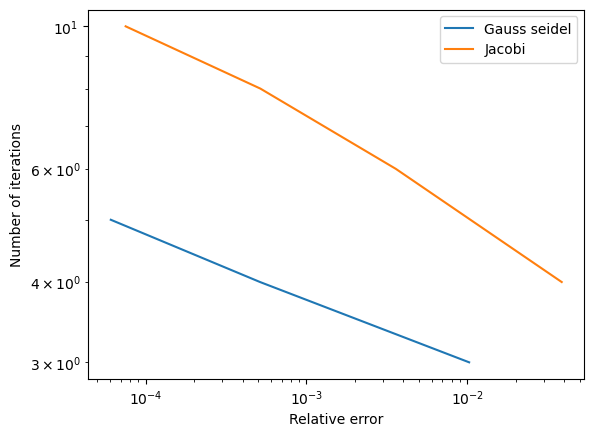

In [21]:
import matplotlib.pyplot as plt
import numpy as np
A = np.array(([[10, -1, 2, 0],
              [-1, 11,-1,3],
              [2, -1,10,-1], 
              [3, 3, 1, 8]])).astype(float)
b = np.array(([6,25,-11,15])).astype(float)
x0 = np.array(([0,0,0,0.1])).astype(float) 
#jacobi iteration 


def jacobi_iteration_criteria(A,b,x0, criteria): 
    Diag = np.diag(A)
    M = np.diag(Diag) #Create matrix with diag A
    inverseM = np.linalg.inv(M)
    L = np.zeros((4,4)) #lower triangular
    for x in range(len(A)):
        for y in range(int(x)):
            L[x][y] = A[x][y] 
    U = np.zeros((4,4)) #upper triangular
    for i in range(len(A)): 
        for j in range(int(i)):
            U[j][i] = A[j][i] 
    relative_error = 1
    counter = 0
    x_k = x0
    while relative_error > criteria: 
        x_k1 = -(inverseM) @ (L + U) @ x_k + inverseM @ b
        relative_error = np.linalg.norm((x_k1 - x_k), ord=np.inf) / np.linalg.norm(x_k, ord = np.inf)
        x_k = x_k1
        counter += 1 
    return relative_error, counter


def gauss_seidel_iteration_criteria(A, b, x_0, criteria): 
    Diag = np.diag(A)
    M = np.diag(Diag) #Create matrix with diag A
    L = np.zeros((4,4)) #lower triangular
    for x in range(len(A)): 
        for y in range(int(x)):
            L[x][y] = A[x][y] 
    U = np.zeros((4,4)) #upper triangular
    for i in range(len(A)): 
        for j in range(int(i)):
            U[j][i] = A[j][i] 
    relative_error = 1
    counter = 0 
    x_k = x0
    while relative_error > criteria: 
        x_k1 = np.linalg.inv(L + M) @ (-U @ x_k + b) 
        relative_error = np.linalg.norm((x_k1 - x_k), ord=np.inf) / np.linalg.norm(x_k, ord=np.inf)
        x_k = x_k1
        counter += 1 
        
    return relative_error, counter


errors1 = []
list1 = []
for i in range(1,5):
    gs_error, iters = ((gauss_seidel_iteration_criteria(A,b,x0, 10 ** -i)))
    errors1.append(gs_error)
    list1.append(iters)


plt.loglog(errors1, list1, label = "Gauss seidel")

ja_errors = []
ja_iter_list = []
for i in range(1,5):
    ja_error, iters = ((jacobi_iteration_criteria(A,b,x0, 10 ** -i)))
    ja_errors.append(ja_error)
    ja_iter_list.append(iters)


plt.loglog(ja_errors, ja_iter_list, label = "Jacobi")
plt.ylabel("Number of iterations")
plt.xlabel("Relative error") 
plt.legend()


Problem 2


In [26]:
x0=0.5
true_fixed_point=(3-np.sqrt(5))/2
def T(x):
    return (3*x-1)/x
def fixedpoint(x0, T, n, true_fixed_point):
    xn=x0
    for n in range(n):
        x1=T(xn)
        xn=x1
    err= abs(x1-true_fixed_point)
    return err
print("The error after 4 iterations is", fixedpoint(x0,T, 4, true_fixed_point))


The error after 4 iterations is 2.218033988749895


In [28]:
x0 = 0.5
def f(x):
    return x**2-3*x+1 
def f1(x):
    return 2*x-3 

def newton(x0, f, f1,n):
    xn = x0
    for n in range(n): 
        x1 = xn - f(xn) / f1(xn) 
        xn = x1 
    err = xn - true_fixed_point
    return err

print("The error after 4 iterations is", newton(x0,f,f1,4),) 

The error after 4 iterations is -3.398874989485323e-05
